In [86]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [16]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df["Target"]=iris.target
df.columns=["Sepal_l","Sepal_w","Petal_l","Petal_w","Target"]

In [27]:
df.head(5)

,Sepal_l,Sepal_w,Petal_l,Petal_w,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.isnull().any()

Sepal_l    False
Sepal_w    False
Petal_l    False
Petal_w    False
Target     False
dtype: bool

In [44]:
df.notnull().any()

Sepal_l    True
Sepal_w    True
Petal_l    True
Petal_w    True
Target     True
dtype: bool

In [241]:
X_tr,X_ts,y_tr,y_ts=train_test_split(iris.data,iris.target,random_state=0)
X_tr.shape,y_tr.shape

((112, 4), (112,))

In [63]:
linear=LinearRegression()
linear.fit(X_tr,y_tr)
linear.intercept_,linear.coef_ 

(0.30015130069800344,
 array([-0.15330146, -0.02540761,  0.26698013,  0.57386186]))

In [64]:
linear.predict(X_ts)

array([ 2.07872867,  0.9662282 , -0.16117412,  1.82229476, -0.03749929,
        2.28704244, -0.03604989,  1.30986735,  1.27147131,  1.10781204,
        1.59744796,  1.299921  ,  1.23731195,  1.32145191,  1.34954356,
       -0.11133487,  1.36886386,  1.2542803 ,  0.03401222, -0.05014733,
        1.82644819,  1.42764369,  0.09995305,  0.04048737,  1.59299693,
       -0.1147503 ,  0.15857194,  1.17003517,  0.9301028 ,  0.10397109,
        1.74160045,  1.45830398, -0.07070034,  1.62994357,  2.00546549,
        1.27901229, -0.04419114,  1.59151965])

In [150]:
linear.score(X_tr,y_tr),linear.score(X_ts,y_ts)

(0.9402871685925521, 0.8886123598795969)

(38,)

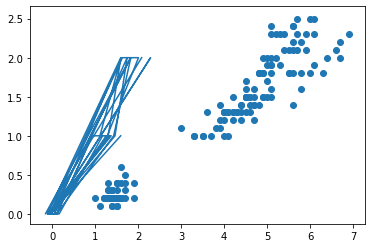

In [151]:
# y_ts=y_ts.reshape(-1,1)
pr=linear.predict(X_ts)
pl.plot(pr,y_ts)
pl.scatter(df.Petal_l,df.Petal_w,cmap=pl.cm.get_cmap("cubehelix",2))

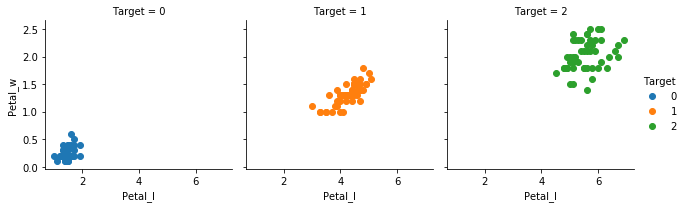

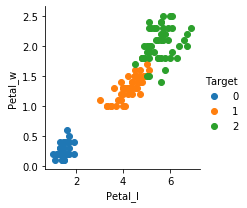

In [98]:
sns.FacetGrid(df,col="Target",hue="Target")\
    .map(pl.scatter,'Petal_l','Petal_w')\
    .add_legend()
sns.FacetGrid(df,hue="Target")\
    .map(pl.scatter,'Petal_l','Petal_w')\
    .add_legend()

[[-0.02420211]
 [-0.1285464 ]
 [ 0.35714057]
 [ 0.2002149 ]] [-0.03004325]


112

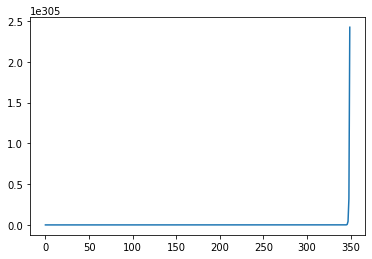

In [244]:
y_tr=y_tr.reshape(-1,1)
m=np.zeros(4).reshape(-1,1)
c=0
L=0.01
reps=100
n=X_tr.shape[0]
error=[]
d_m=[0,0,0,0]
d_c=0
for i in range(reps):
    y_pred=np.dot(X_tr,m)+c
    d_m=(-2/n)*np.sum((y_tr-y_pred)*X_tr,axis=0).reshape(-1,1)
    d_c=(-2/n)*sum(y_tr-y_pred)
    m=m-L*d_m
    c=c-L*d_c
    er=np.mean(np.square(y_tr-y_pred))
    error.append(er)
print(m,c)
pl.plot(err)


In [220]:
linear.intercept_,linear.coef_

(0.30015130069800344,
 array([-0.15330146, -0.02540761,  0.26698013,  0.57386186]))

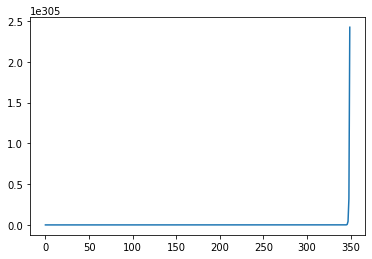

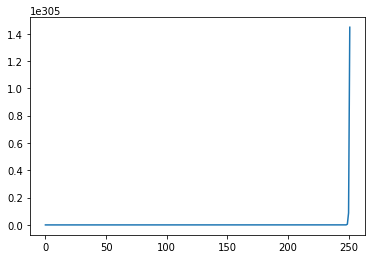

In [195]:
pl.plot(err)

In [252]:
y_ts.shape

(38,)

In [254]:
la=linear.score(X_tr,y_tr)
lb=ridge.score(X_ts,y_ts)
la,lb

(0.9402871685925521, 0.8876982200743924)

In [255]:
ridge=Ridge().fit(X_tr,y_tr)
ridge.predict(X_ts)
ra=ridge.score(X_tr,y_tr)
rb=ridge.score(X_ts,y_ts)
ra,rb

(0.9398707938221027, 0.8876982200743924)

In [251]:
lasso=Lasso().fit(X_tr,y_tr)
lasso.score(X_tr,y_tr),ridge.score(X_ts,y_ts)

(0.46493723077817173, 0.8876982200743924)

In [ ]:
df.DateFrame()